In [24]:
import matplotlib.pyplot as plt

In [3]:
import os
import pandas as pd

from env import user, host, password


def get_connection(db, user=user, host=host, password=password):
    
    return f'mysql+pymysql://{user}:{password}@{host}/{db}'


def acquire_store():
    
    filename = 'store.csv'
    
    if os.path.exists(filename):
        
        return pd.read_csv(filename)
    
    else:
        
        query = '''
                SELECT sale_date, sale_amount,
                item_brand, item_name, item_price,
                store_address, store_zipcode
                FROM sales
                LEFT JOIN items USING(item_id)
                LEFT JOIN stores USING(store_id)
                '''
        
        url = get_connection(db='tsa_item_demand')
        
        df = pd.read_sql(query, url)
        
        df.to_csv(filename, index=False)
        
        return df

In [47]:
df = acquire_store()

In [48]:
def datetime_index(df):
    df['sale_date'] = pd.to_datetime(df['sale_date'])
    return df.set_index('sale_date').sort_index()

In [49]:
df = datetime_index(df)

In [50]:
def plot_value_counts(df):
    plt.title('Sale Amount')
    df.sale_amount.value_counts(bins=20).sort_index().plot()
    plt.xticks(rotation=30)
    plt.show()
    
    plt.title('Item Price')
    df.item_price.value_counts(bins=20).sort_index().plot()
    plt.xticks(rotation=30)
    plt.show()
    
    

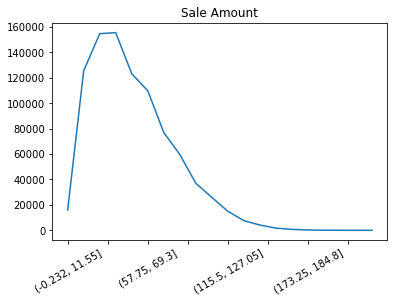

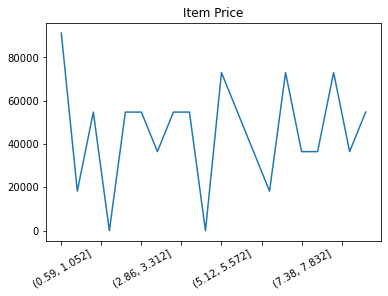

In [51]:
plot_value_counts(df)

In [52]:
def add_features(df):
    df['month'] = df.index.strftime('%B')
    df['day_of_week'] = df.index.strftime('%A')
    df['sales_total'] = df.sale_amount * df.item_price
    return df

In [54]:
df = add_features(df)

In [55]:
df.head()

,sale_amount,item_brand,item_name,item_price,store_address,store_zipcode,month,day_of_week,sales_total
sale_date,,,,,,,,,
2013-01-01,13,Riceland,Riceland American Jazmine Rice,0.84,12125 Alamo Ranch Pkwy,78253,January,Tuesday,10.92
2013-01-01,26,Mueller,Mueller Sport Care Basic Support Level Medium ...,8.40,12018 Perrin Beitel Rd,78217,January,Tuesday,218.40
2013-01-01,27,Mama Marys,Pizza Sauce,4.65,12018 Perrin Beitel Rd,78217,January,Tuesday,125.55
2013-01-01,54,Mueller,Mueller Sport Care Basic Support Level Medium ...,8.40,15000 San Pedro Ave,78232,January,Tuesday,453.60
2013-01-01,35,Mueller,Mueller Sport Care Basic Support Level Medium ...,8.40,735 SW Military Dr,78221,January,Tuesday,294.00
